In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)


In [2]:
train_data = pd.read_csv("train.csv")
train_data.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
150,151,20,RL,120.0,10356,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1975,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,716,Unf,0,253,969,GasA,TA,Y,SBrkr,969,0,0,969,0,0,1,1,3,1,TA,5,Typ,0,NaN,Attchd,1975.0,Unf,2,440,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000
1285,1286,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Fa,CBlock,TA,TA,No,Unf,0,Unf,0,780,780,GasA,Ex,Y,FuseF,825,587,0,1412,0,0,1,0,4,1,TA,6,Typ,1,Gd,Detchd,1939.0,Unf,1,280,TA,TA,Y,45,0,0,0,0,0,NaN,NaN,NaN,0,5,2009,WD,Normal,132500
679,680,20,RL,NaN,9945,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1961,1961,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,57.0,TA,TA,CBlock,TA,TA,No,Rec,827,Unf,0,161,988,GasA,TA,Y,SBrkr,988,0,0,988,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1963.0,Unf,2,572,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,10,2007,WD,Normal,128500
536,537,60,RL,57.0,8924,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1998,1999,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,880,880,GasA,Ex,Y,SBrkr,880,844,0,1724,0,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,1998.0,Fin,2,527,TA,TA,Y,120,155,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,188000
230,231,20,RL,73.0,8760,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1959,1959,Hip,CompShg,MetalSd,MetalSd,BrkFace,220.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1194,1194,GasA,TA,Y,SBrkr,1194,0,0,1194,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,1,312,TA,TA,Y,0,0,120,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,148000


In [3]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
num_cols = list(set(train_data.describe().columns) - set(['Id']))
cat_cols = list(set(train_data.columns) - set(num_cols) - set(['Id']))

## Some Visualizations that help us understand the data

In [5]:
len(train_data)

1460

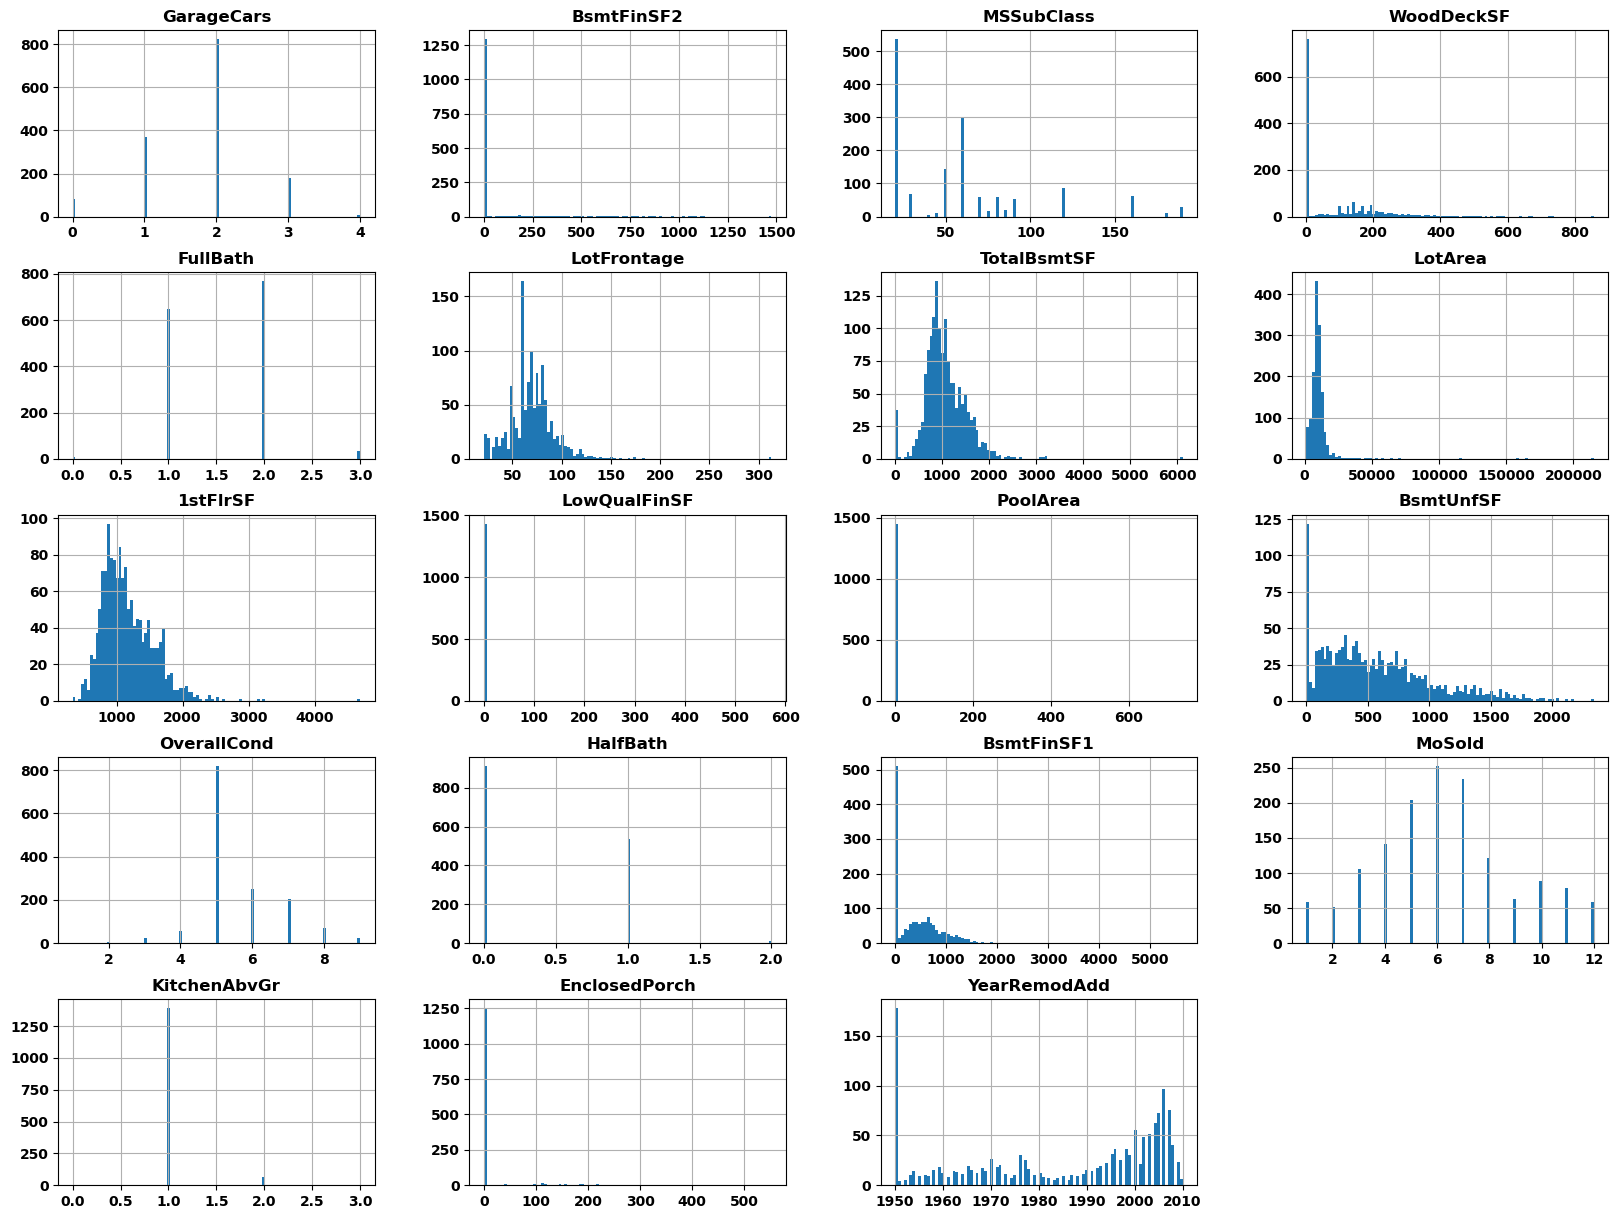

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data[num_cols[:19]].hist(bins = 100, figsize = (20, 15));

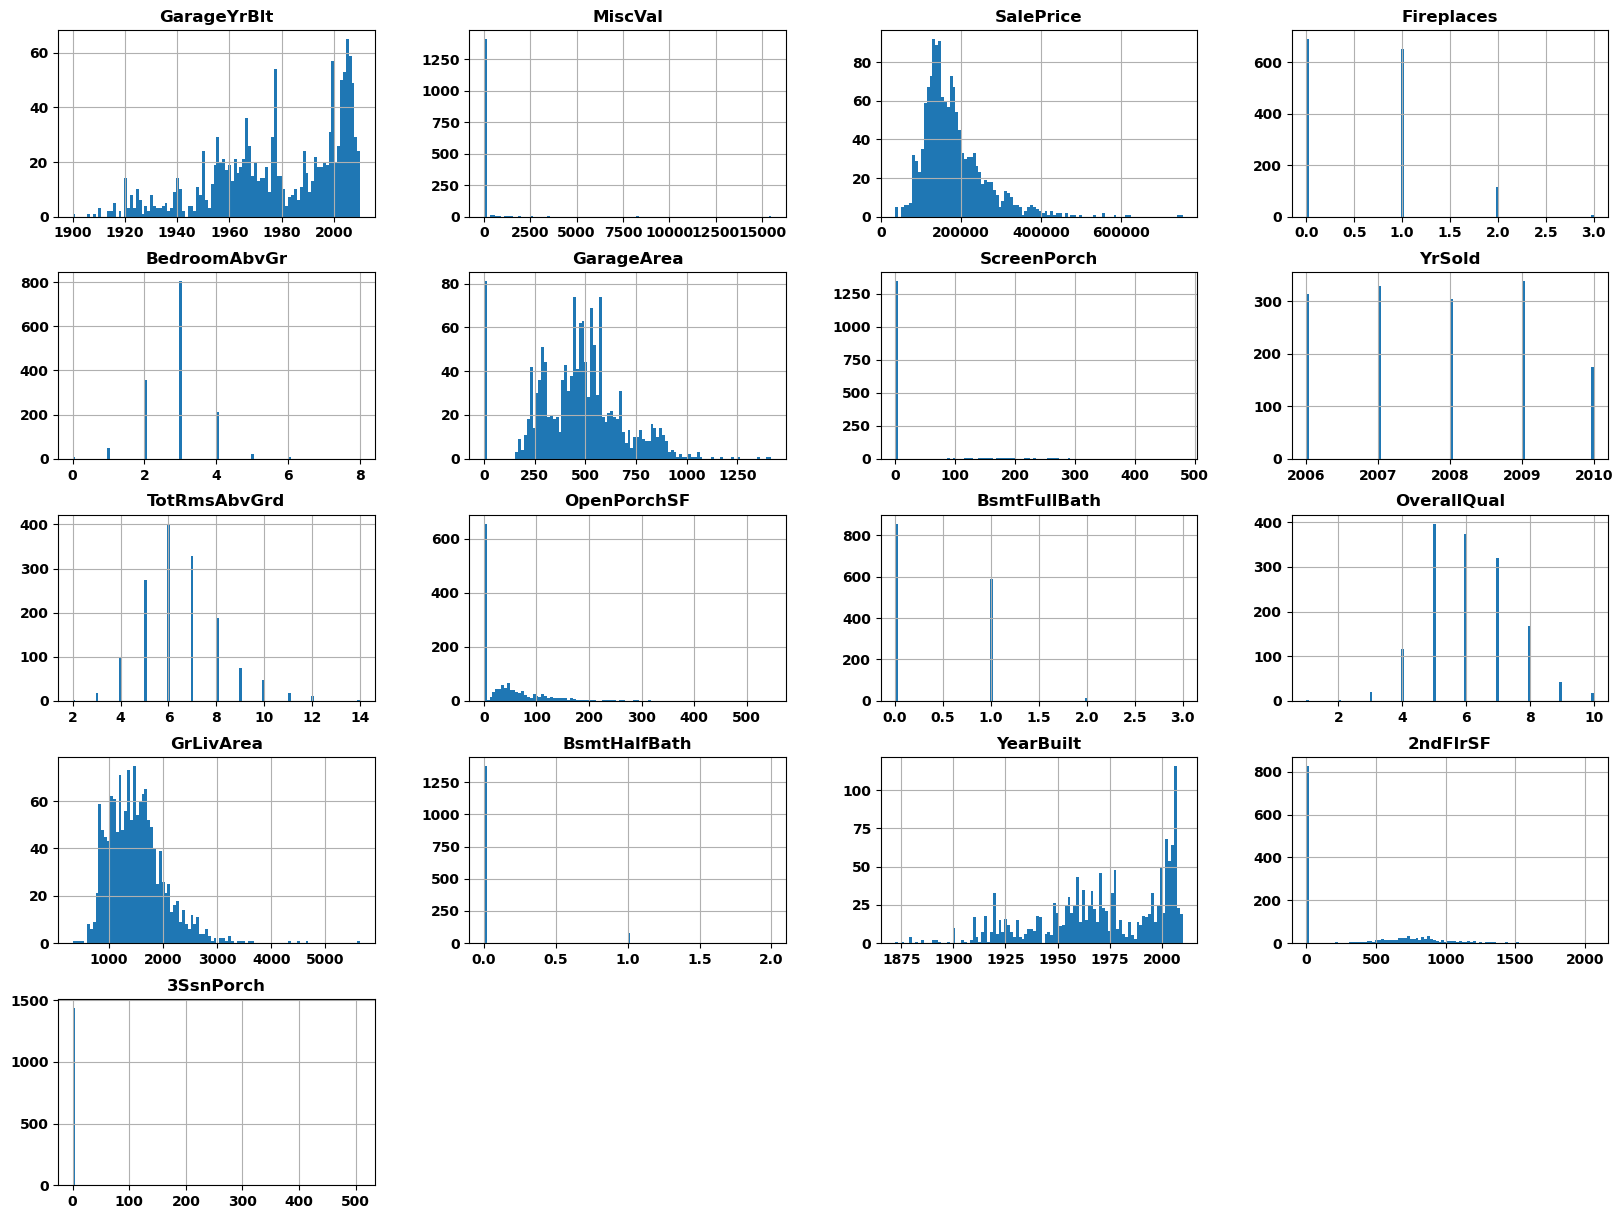

In [7]:
train_data[num_cols[20:]].hist(bins = 100, figsize = (20, 15));

In [8]:
#Understand the type of data and quality
train_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

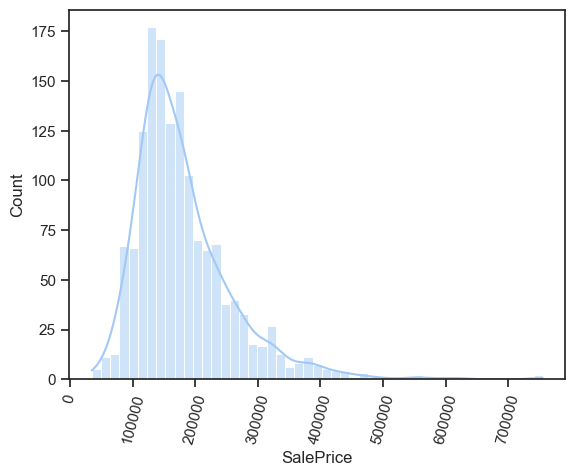

In [9]:
import seaborn as sns
sns.set_theme(style="ticks", palette="pastel")
sns.histplot(train_data['SalePrice'], kde = True)
plt.xticks(rotation=75);

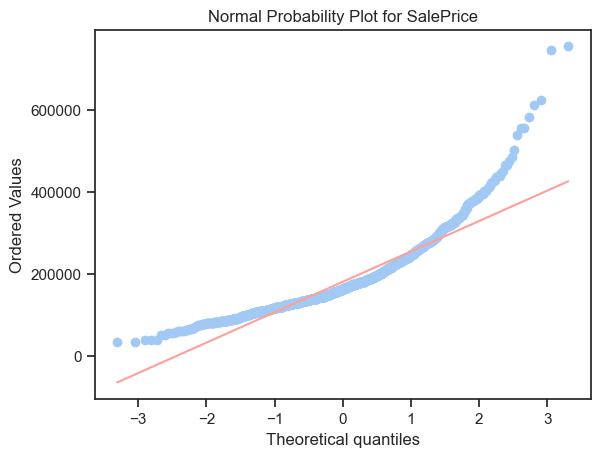

In [10]:
from scipy import stats
# Create a normal probability plot (Q-Q plot)
stats.probplot(train_data['SalePrice'], dist="norm", plot=plt)

# Add a title
plt.title("Normal Probability Plot for SalePrice");


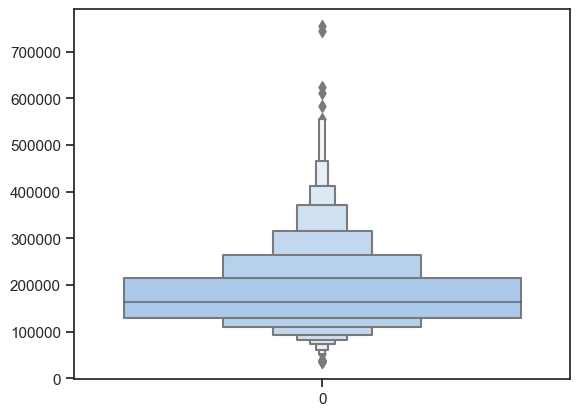

In [11]:
#Understand the outlierds 
sns.set_theme(style="ticks", palette="pastel")
sns.boxenplot(data=train_data['SalePrice']);

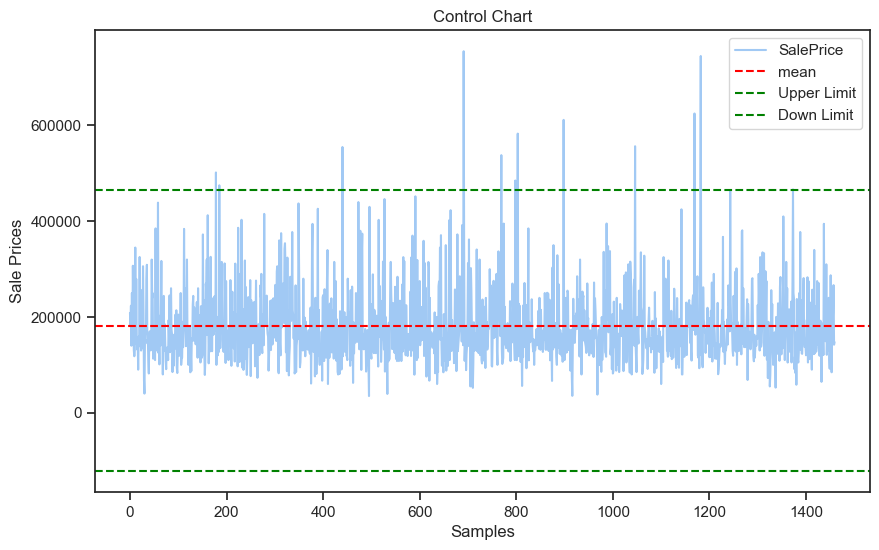

In [12]:
mean = train_data["SalePrice"].mean()
Q1 = np.percentile(train_data["SalePrice"] , q = 25 , method = 'midpoint')
Q3 = np.percentile(train_data["SalePrice"] , q =  75 , method = 'midpoint')
IQR = Q3 - Q1
        
upper_bound = Q3 + (3 * IQR)
lower_bound = Q1 - (3 * IQR)

# built the control chart
plt.figure(figsize=(10, 6))
plt.plot(train_data['SalePrice'], label='SalePrice')
plt.axhline(mean, color='red', linestyle='--', label='mean')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Limit')
plt.axhline(lower_bound, color='green', linestyle='--', label='Down Limit')
plt.xlabel('Samples')
plt.ylabel('Sale Prices')
plt.title('Control Chart')
plt.legend()
plt.show()

In [13]:
corr_matrix = train_data[num_cols].corr()

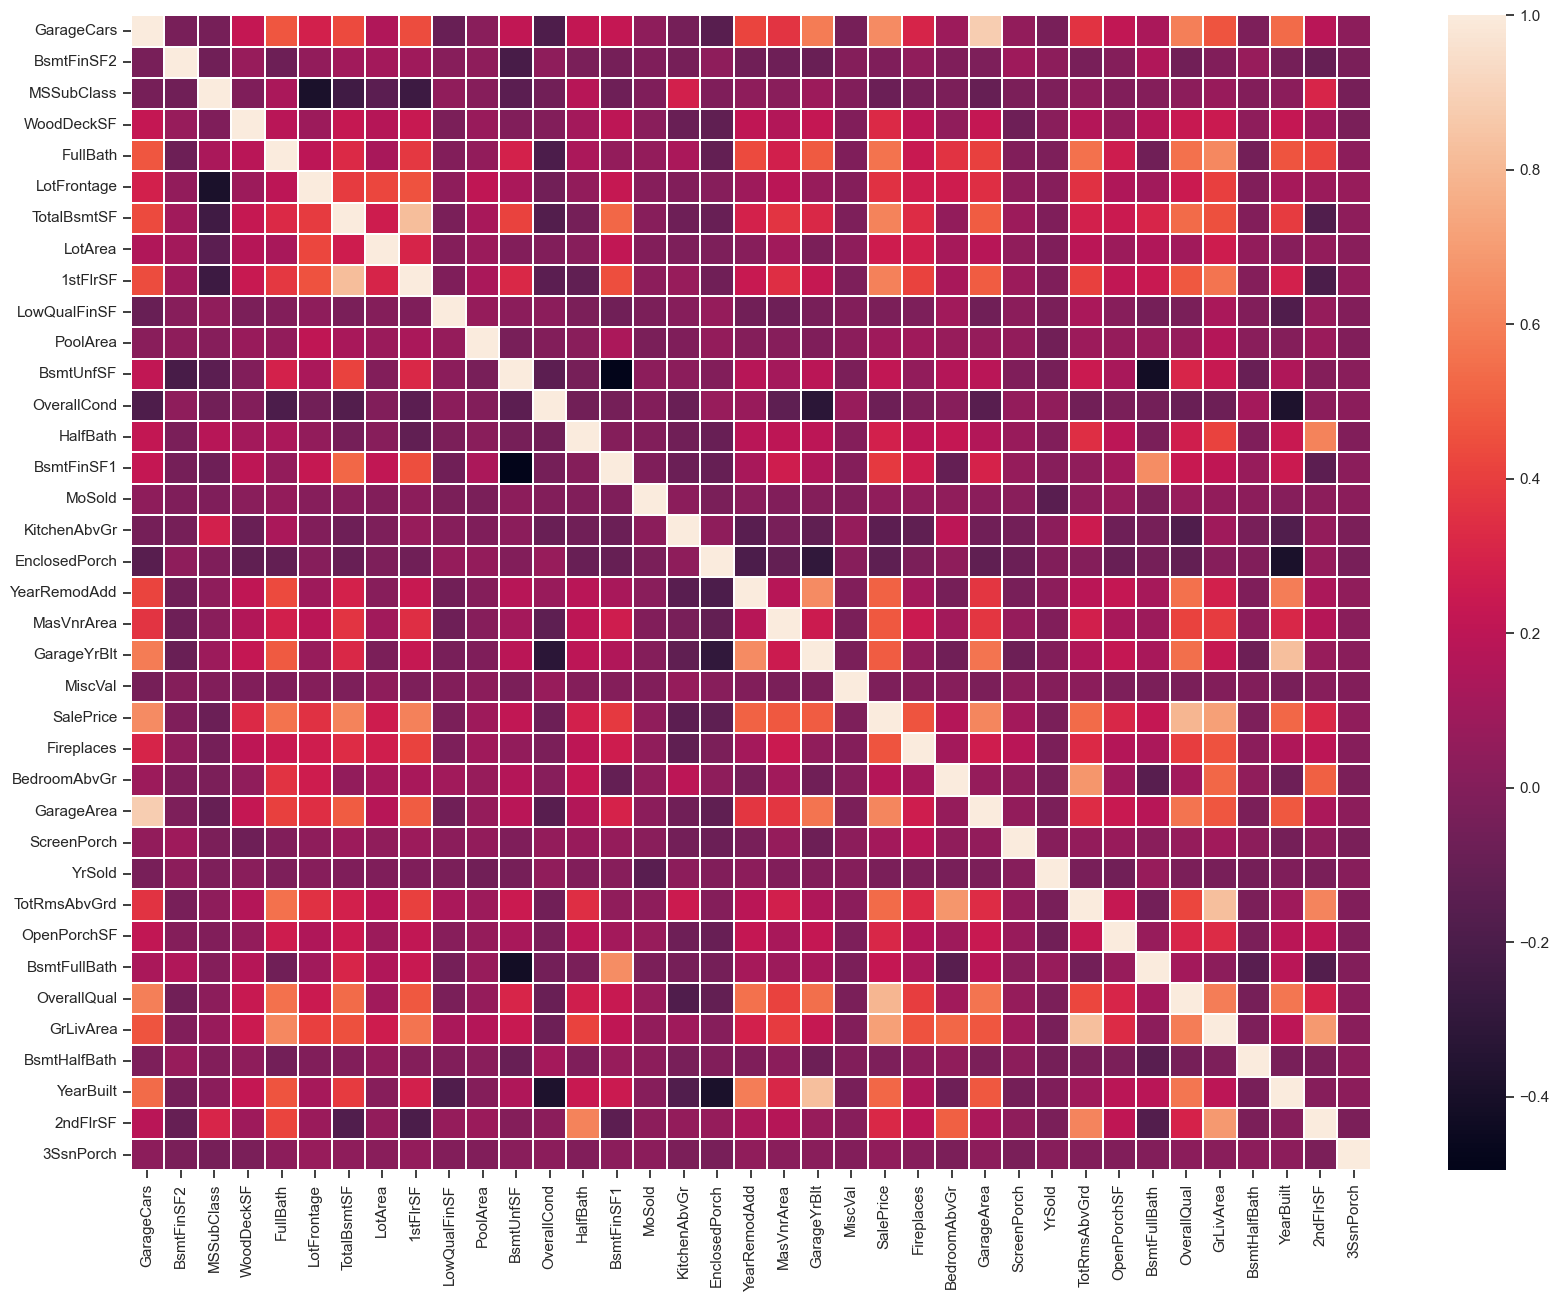

In [14]:
plt.subplots(figsize = (20, 15))
sns.heatmap(corr_matrix, 
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values, 
           linewidth = 0.1);

## Categorical Variables Visuals

In [15]:
#making dataframes each of them contains the categories of a catgegorical variable and theire frequencies
df_list=[]
for cat_column in cat_cols:
    df_list.append(train_data.groupby([cat_column])['Id'].count().reset_index().rename(columns = {'Id' : 'count'}))

In [16]:
len(df_list)


43

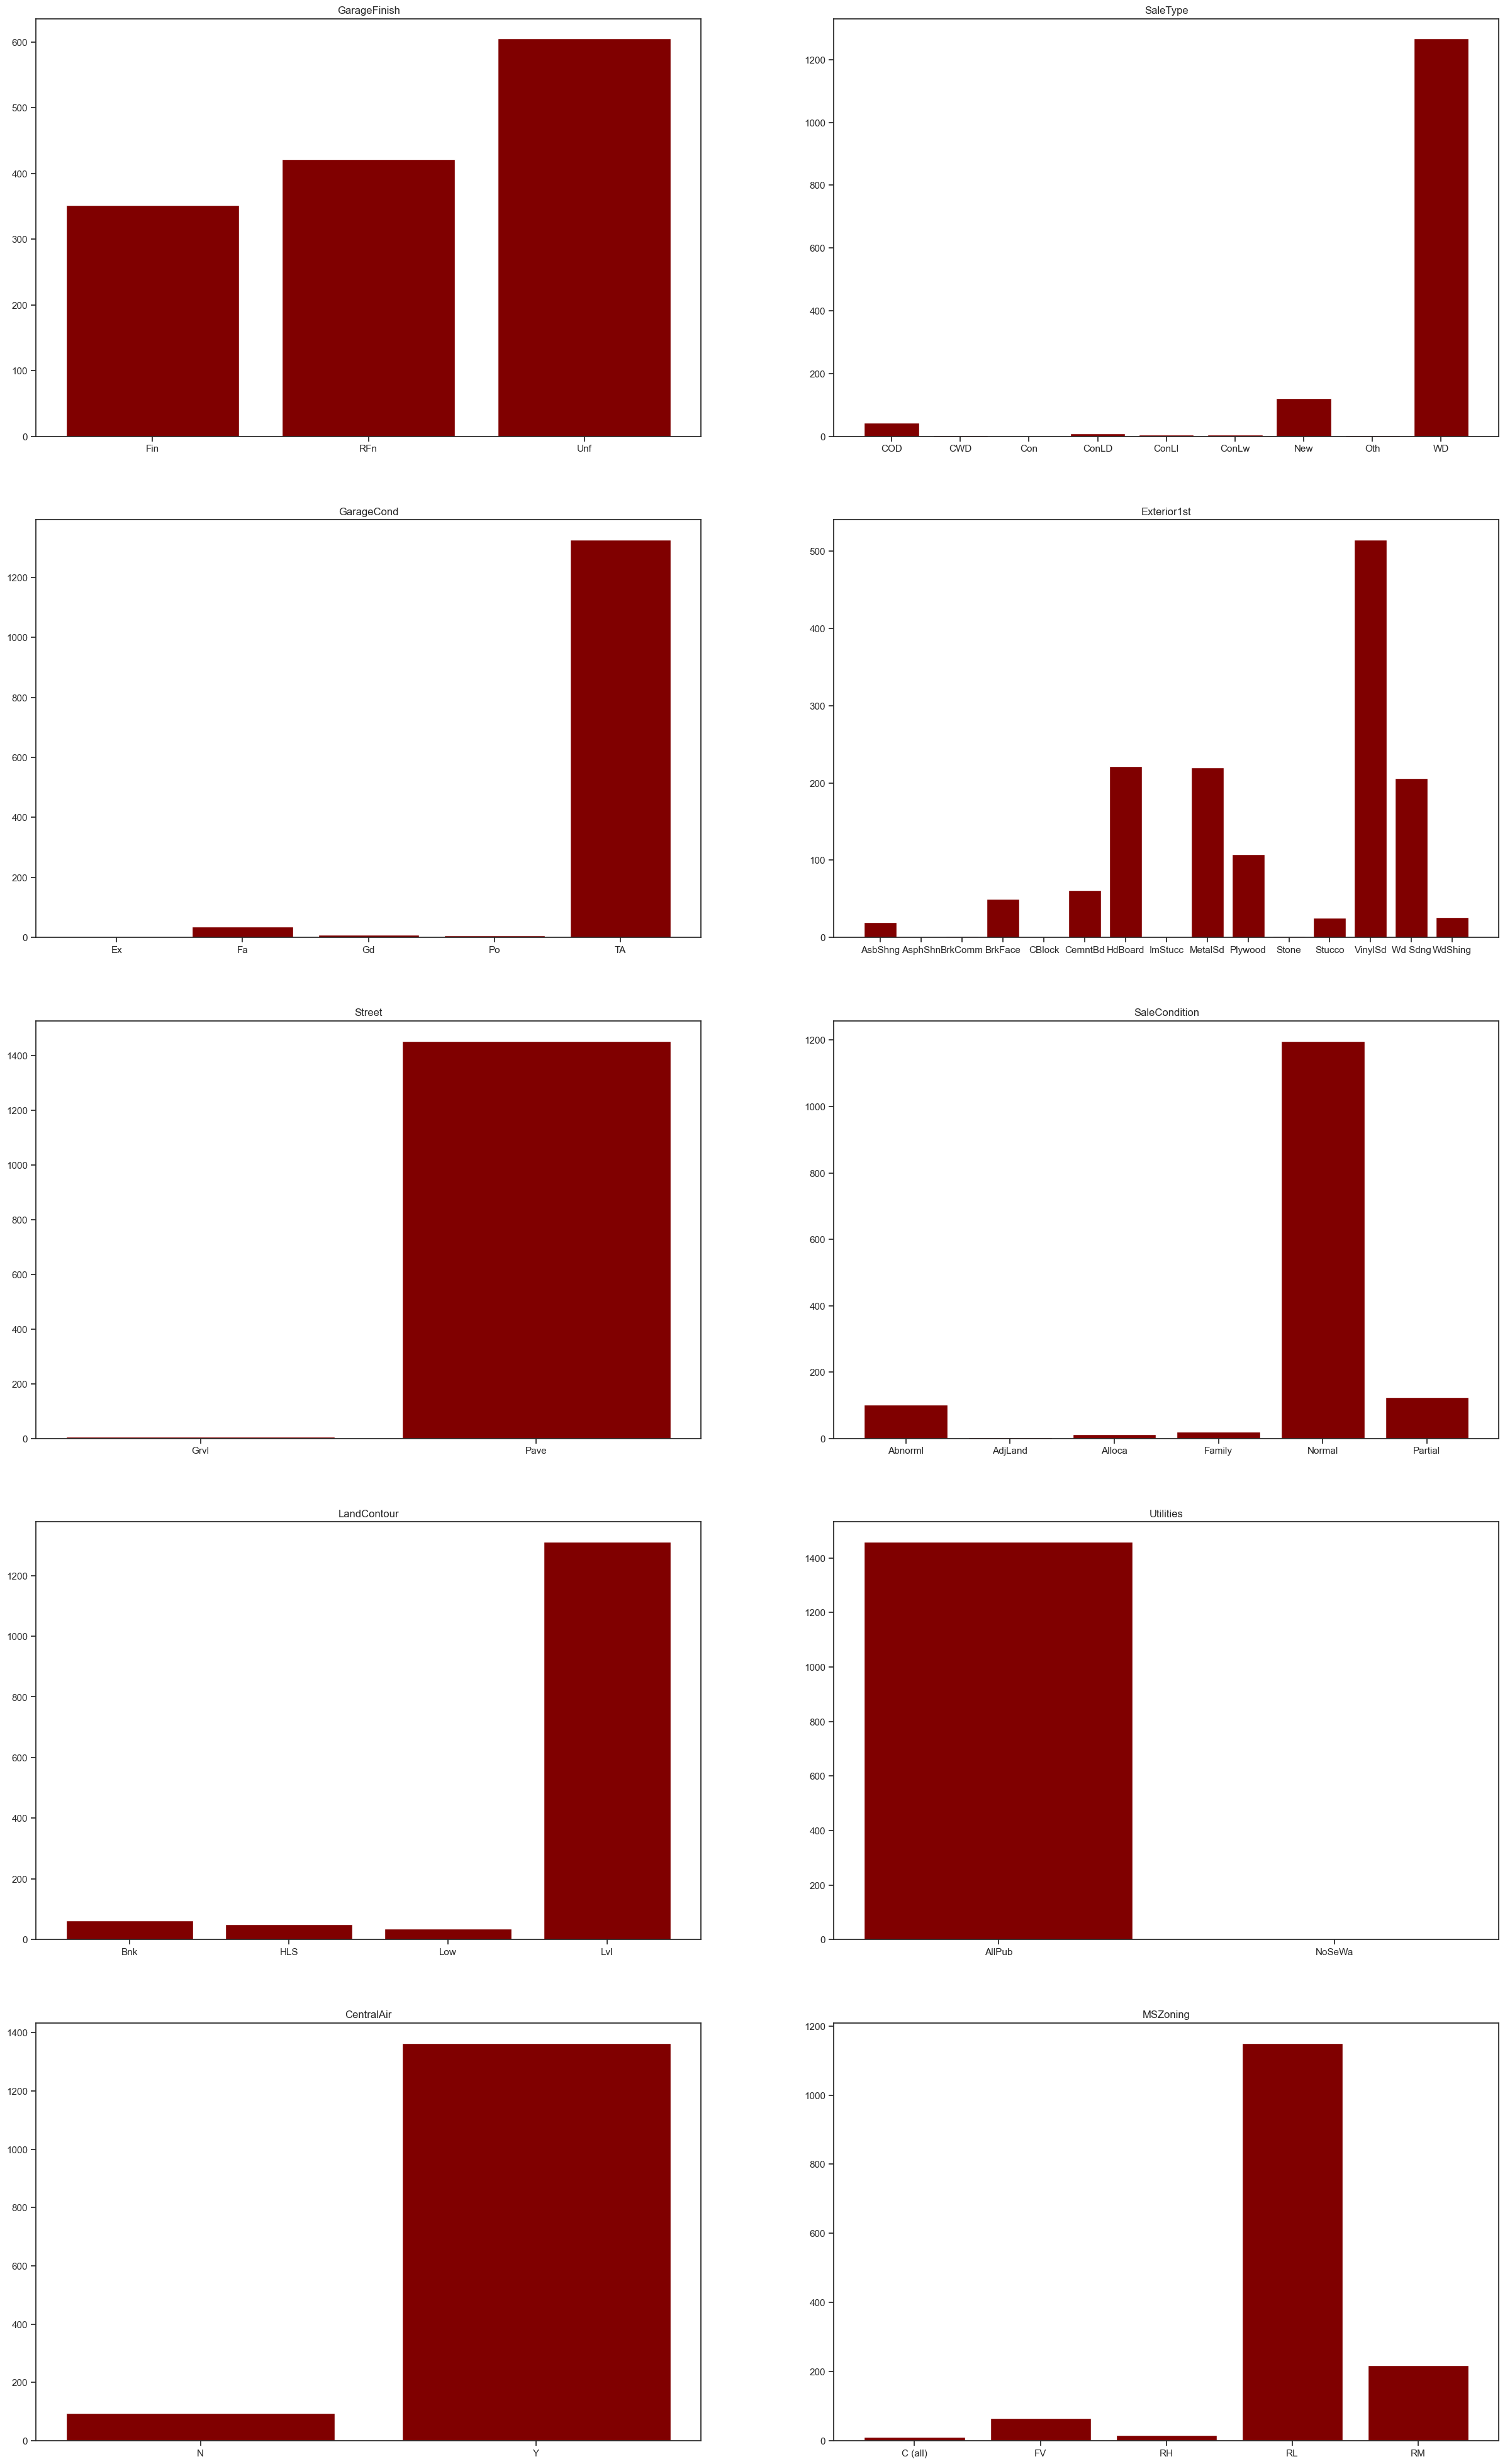

In [17]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[0:10]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

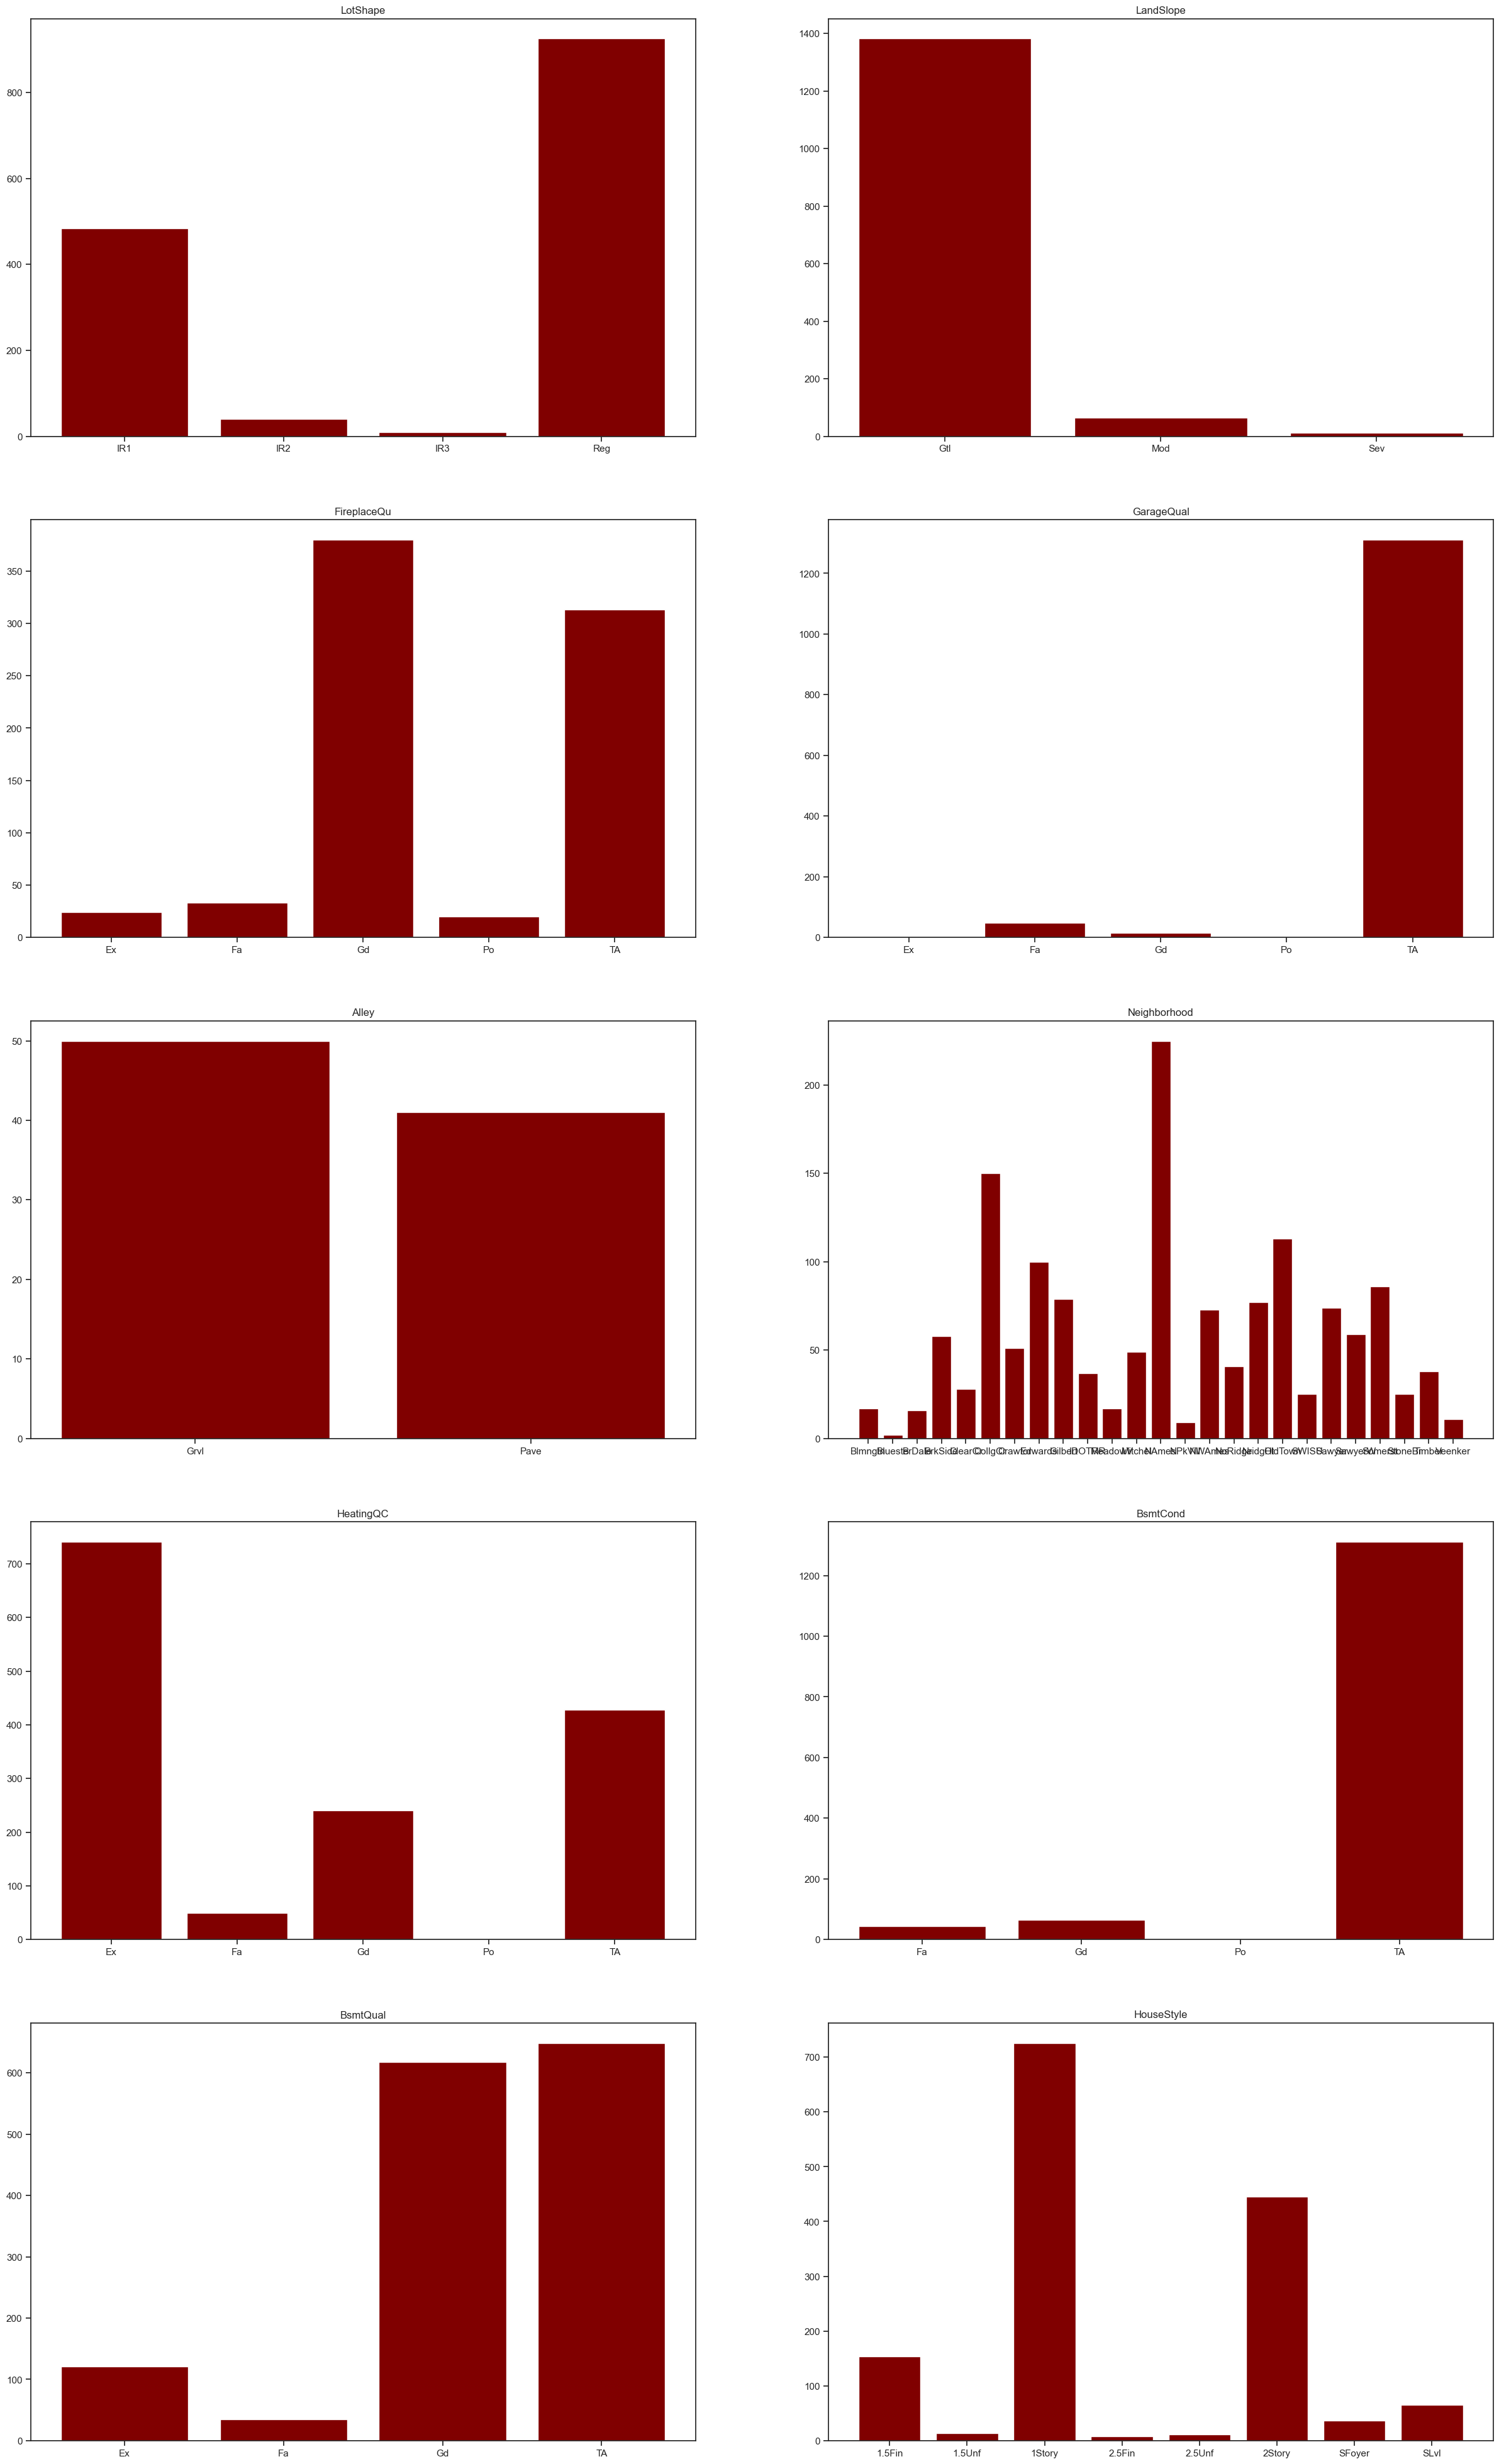

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[10:20]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

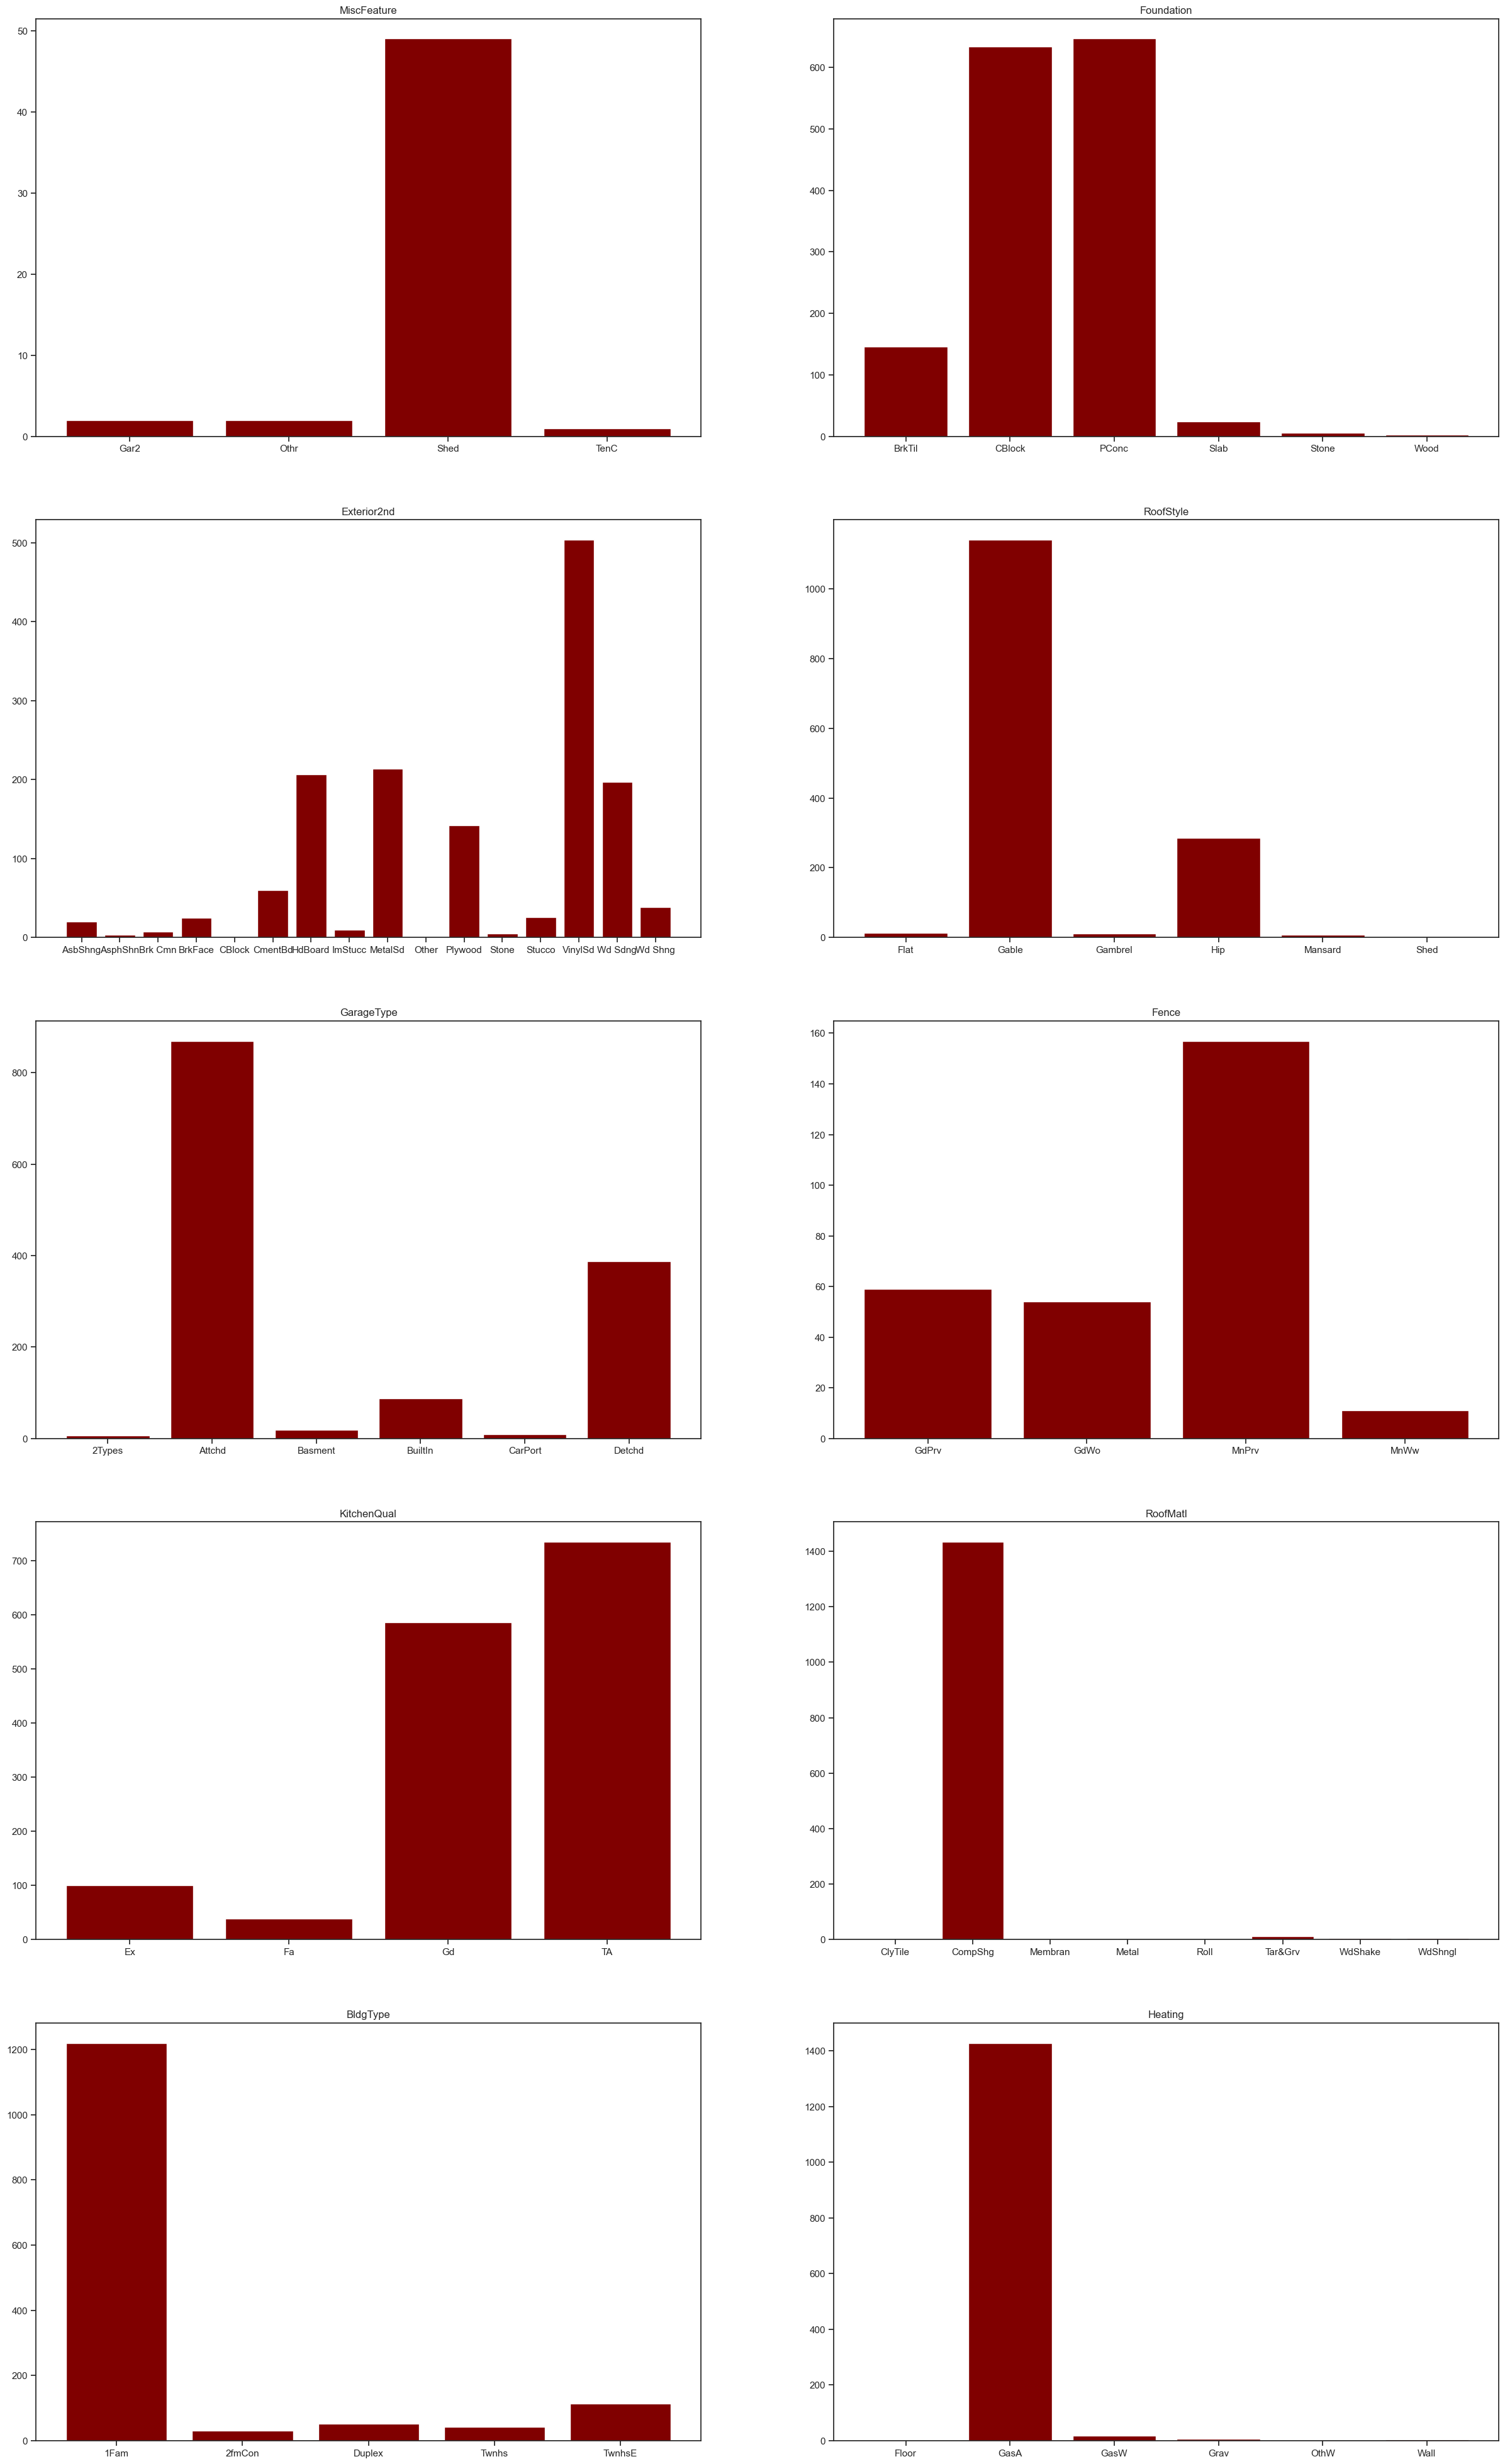

In [19]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[20:30]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

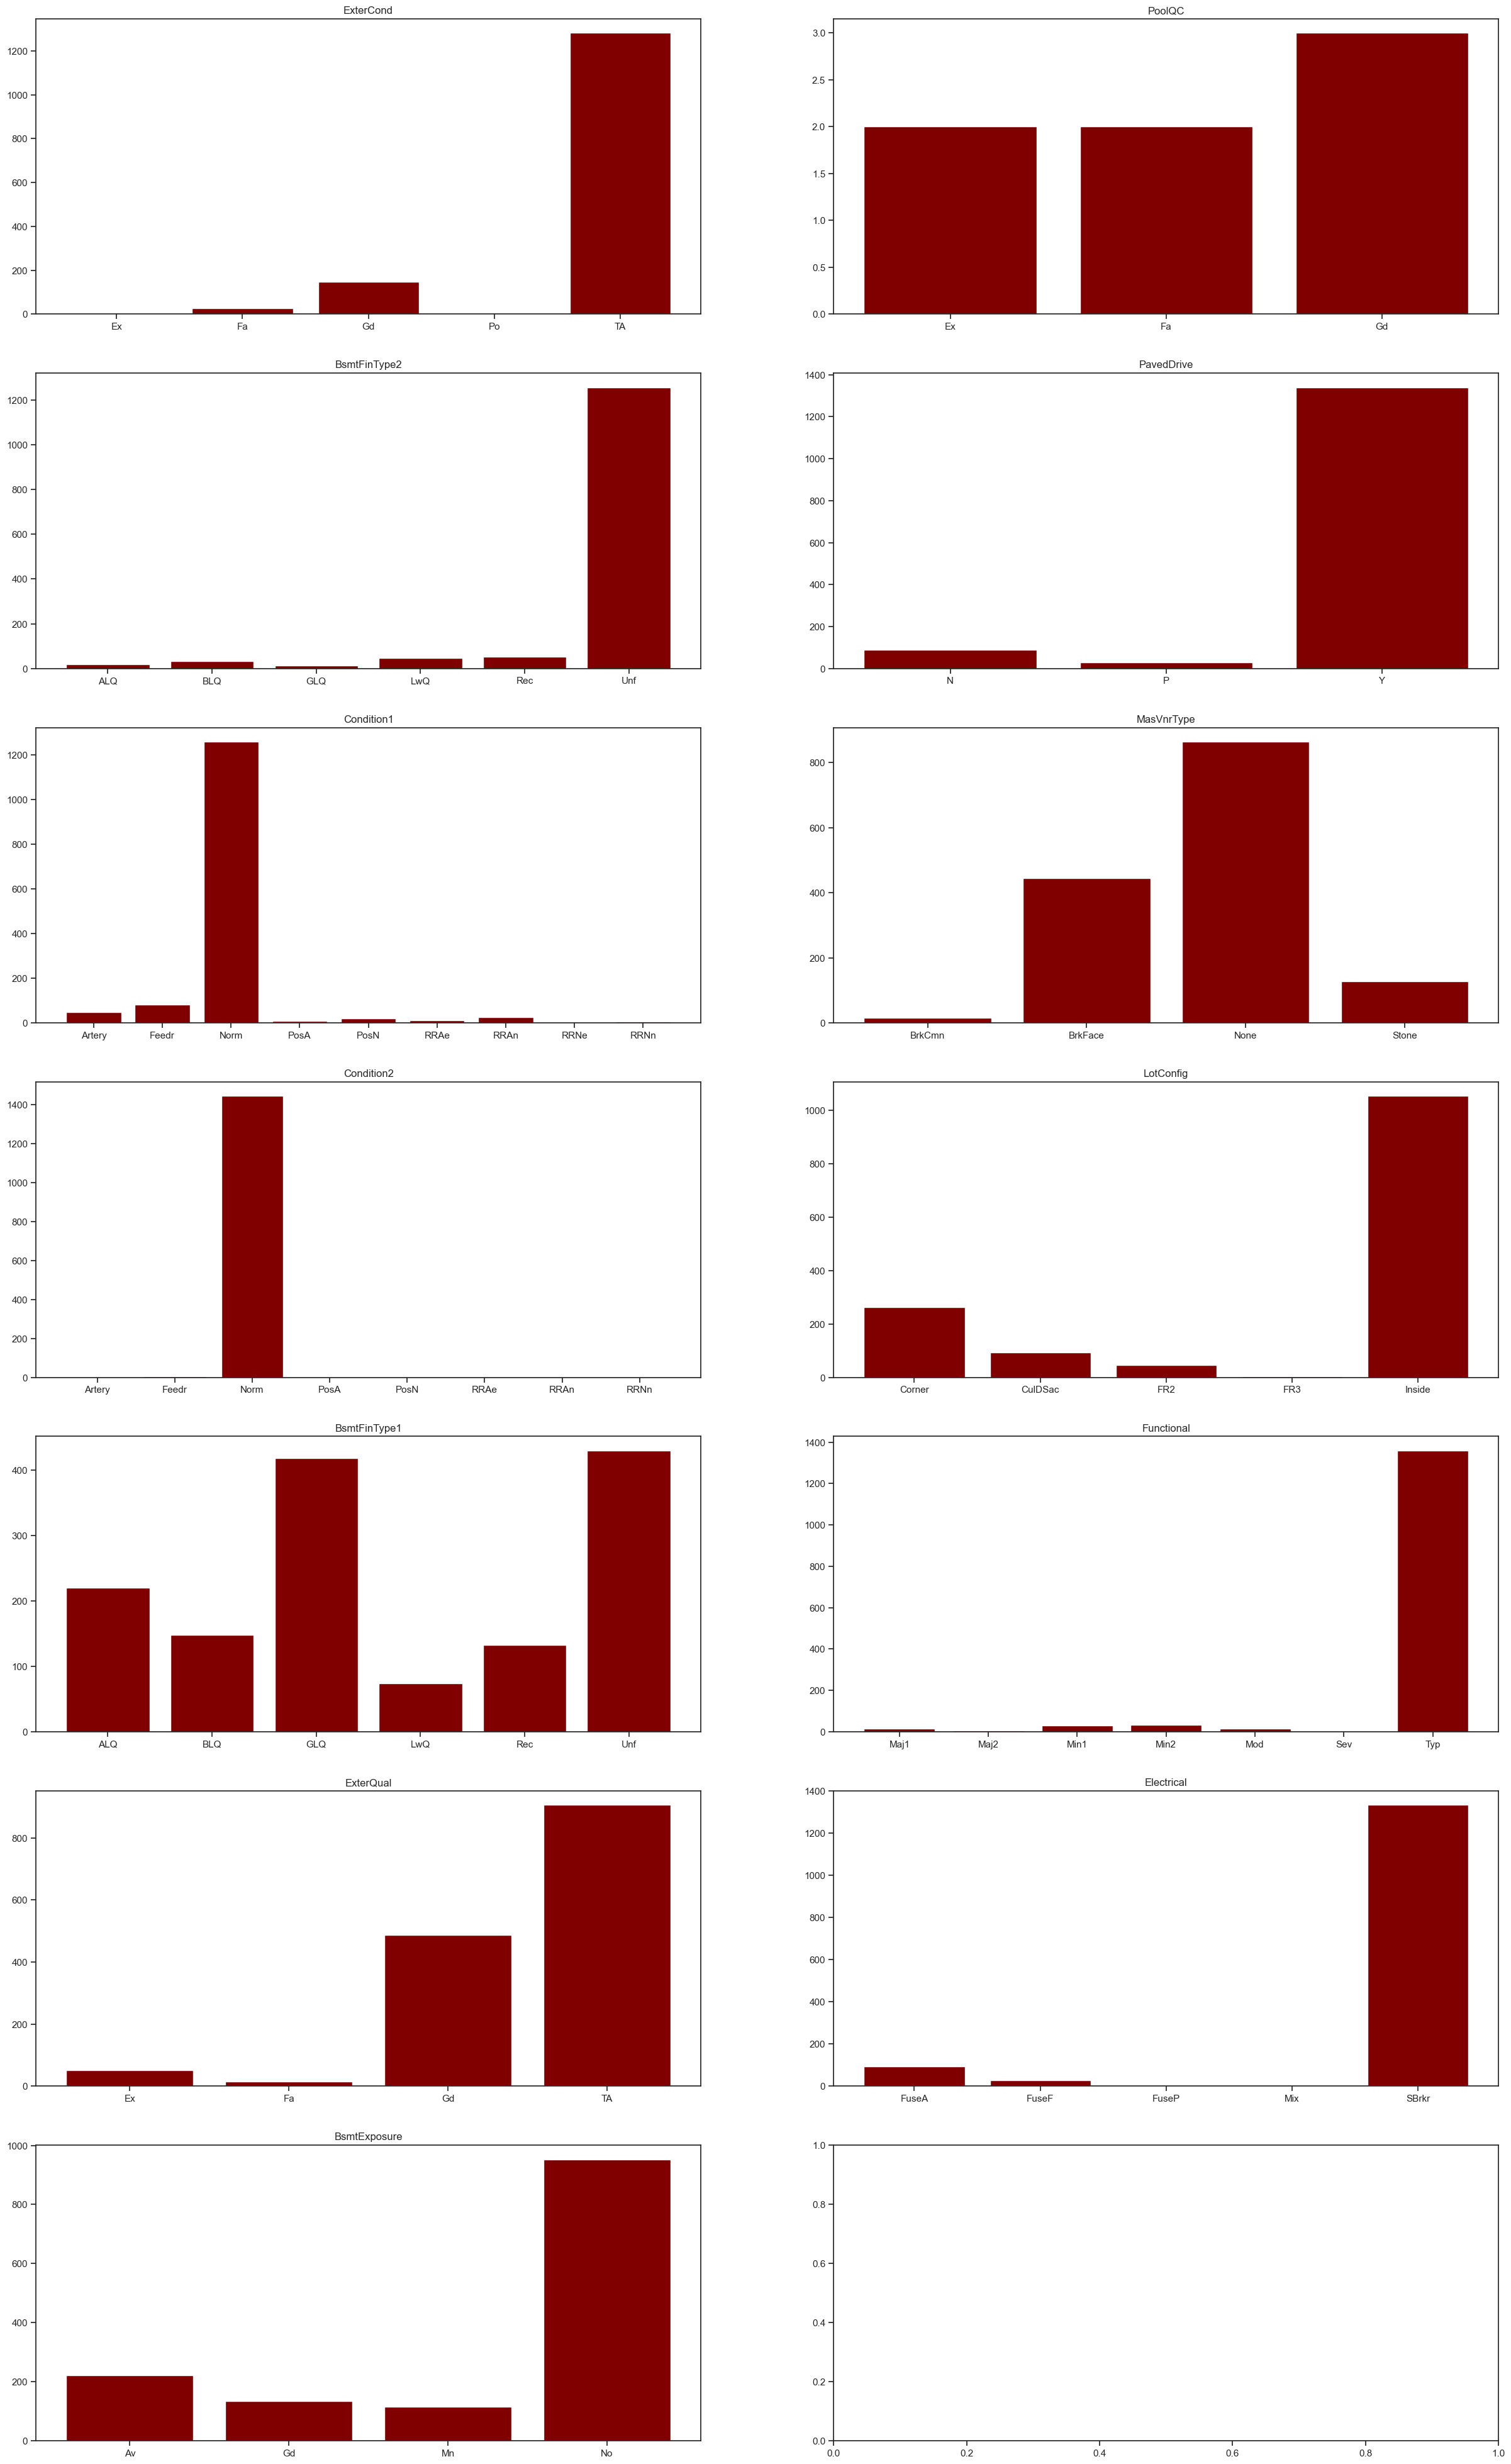

In [20]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(30, 50))
i=0
j=0
for df in df_list[30:]:
    axes[i, j].bar(df.iloc[:, 0],df.iloc[:, 1], color ='maroon')
    axes[i, j].set_title(df.columns[0])
    if(j<1):
        j+=1
    else:
        i+=1
        j=0
plt.show()

## Data Pre-processing
1- Handling Null Values

2- Dropping Features which have more than 80% of values with the same value

3- removing highly correlated features to avoid multi-collinearity as much as we can

4- removing/clamping outliers

5- transforming highly skewed data to reduce their skewness

6- checking for each features whether it follows a normal distribution or not to decide whether to standardize or min-max scale)

7- classify your categorical features into (ordinal and nominal) to decide which features will be label encoded and which features should be OHE

### Handling NULL values

In [21]:
nulls_df = train_data.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count
3,LotFrontage,259
6,Alley,1369
25,MasVnrType,8
26,MasVnrArea,8
30,BsmtQual,37
31,BsmtCond,37
32,BsmtExposure,38
33,BsmtFinType1,37
35,BsmtFinType2,38
42,Electrical,1


In [22]:
# columns which have more than 60% of the data NULL values should be dropped
train_data = train_data.drop(columns = ['MiscFeature', 'Fence', 'PoolQC', 'FireplaceQu', 'Alley'])

# when the number of nulls in a row is very small, we can simply drop this small number of rows
train_data = train_data.dropna(axis = 0, subset = ['GarageYrBlt', 'MasVnrArea', 'Electrical', 
                                                   'GarageFinish', 'GarageQual', 'GarageCond', 'GarageType',
                                                   'BsmtFinType2', 'BsmtFinType1', 'BsmtExposure', 'BsmtCond', 
                                                   'BsmtQual', 'MasVnrType'])

train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())

In [23]:
nulls_df = train_data.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]


,index,Nulls_Count


In [24]:
#updete numerical and categorical columns
num_cols = list(set(train_data.describe().columns) - set(['Id']))
cat_cols = list(set(train_data.columns) - set(num_cols) - set(['Id']))

## Dropping any column which has 80% of values with the same value

In [25]:
def get_columns_to_drop(data, num_cols, cat_cols):
    cols_to_drop = []

    # Check numerical columns
    for col in num_cols:
        unique_values = data.groupby(col)['Id'].count().reset_index()
        condition = pd.to_numeric(unique_values['Id']) > 0.8 * pd.to_numeric(unique_values.sum())['Id']
        if len(unique_values[condition]) > 0:
            cols_to_drop.append(col)

    # Check categorical columns
    for col in cat_cols:
        unique_values = data.groupby(col)['Id'].count().reset_index()
        condition = unique_values['Id'] > 0.8 * unique_values.sum()['Id']
        if len(unique_values[condition]) > 0:
            cols_to_drop.append(col)

    return cols_to_drop

result = get_columns_to_drop(train_data, num_cols, cat_cols)
train_data = train_data.drop(columns = result)

In [26]:
print(result)
print("****" * 12)
print(len(result))

['BsmtFinSF2', 'LowQualFinSF', 'PoolArea', 'KitchenAbvGr', 'EnclosedPorch', 'MiscVal', 'ScreenPorch', 'BsmtHalfBath', '3SsnPorch', 'GarageCond', 'SaleType', 'Street', 'SaleCondition', 'LandContour', 'Utilities', 'CentralAir', 'LandSlope', 'GarageQual', 'BsmtCond', 'BldgType', 'RoofMatl', 'Heating', 'ExterCond', 'BsmtFinType2', 'PavedDrive', 'Condition1', 'Condition2', 'Functional', 'Electrical']
************************************************
29


In [27]:
#updete numerical and categorical columns
num_cols = list(set(train_data.describe().columns) - set(['Id']))
cat_cols = list(set(train_data.columns) - set(num_cols) - set(['Id']))

## If we have 2 highly correlated features (corr > 0.7), we drop one of them (the variable which is less correlated to the response variable)

- we want to skip the diagonal and the lower triangle because they redundant
- for ex if we start with the row 0 we will start form row[1]
- if we start with the row 1 we will start form row[2]

In [28]:
# target variable
response_variable = 'SalePrice'

# numerical columns without the target variable
num_cols_without_response_variable = list(set(num_cols) - set([response_variable]))

def remove_highly_correlated_features(train_data, num_cols_without_response_variable, threshold=0.7):
    # Calculate the correlation matrix
    corr_matrix = train_data[num_cols_without_response_variable].corr()

    # Create a set to store columns to drop
    columns_to_drop = set()

    # Iterate through the correlation matrix
    for row_idx in range(corr_matrix.shape[0]):
        for col_idx in range(row_idx + 1, corr_matrix.shape[0]):
            correlation_value = corr_matrix.iloc[row_idx, col_idx]

            if np.abs(correlation_value) > threshold:
                # Identify which column to drop based on correlations with 'SalePrice'
                col_row = num_cols_without_response_variable[row_idx]
                col_col = num_cols_without_response_variable[col_idx]

                corr_row = np.abs(train_data[col_row].corr(train_data[response_variable]))
                corr_col = np.abs(train_data[col_col].corr(train_data[response_variable]))

                if corr_row > corr_col:
                    columns_to_drop.add(col_col)
                else:
                    columns_to_drop.add(col_row)
                    
    # Print the dropped columns
    print("Dropped columns:", columns_to_drop) 
    
    # Drop the highly correlated columns from the DataFrame
    train_data = train_data.drop(columns=columns_to_drop)

    return train_data


# inspecting the correlation between each couple of features
train_data = remove_highly_correlated_features(train_data, num_cols_without_response_variable, threshold=0.7)

Dropped columns: {'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea'}


In [29]:
#updete numerical and categorical columns
num_cols = list(set(train_data.describe().columns) - set(['Id']))
cat_cols = list(set(train_data.columns) - set(num_cols) - set(['Id']))

## Calmp Outliers and log-transform any highly skewed variable

In [30]:
def outliers_clamping(data, num_cols):
    
    # Iterate through numerical columns
    for col in num_cols:
        # Calculate the first quartile (Q1)
        Q1 = np.percentile(data[col], q=25, method='midpoint')
        # Calculate the third quartile (Q3)
        Q3 = np.percentile(data[col], q=75, method='midpoint')
        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Calculate upper and lower bounds for outliers
        upper_bound = Q3 + (1.5 * IQR)
        lower_bound = Q1 - (1.5 * IQR)

        # Use np.clip to clamp (limit) the values in the data[col] column
        # Values greater than upper_bound are set to upper_bound
        # Values less than lower_bound are set to lower_bound
        data[col] = np.clip(data[col], lower_bound, upper_bound)

    # Return the DataFrame with outliers clamped
    return data

In [31]:
outliers_clamping(train_data , num_cols)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,2003.0,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706.0,150.0,Ex,856,854,1710,1,2,1,3.0,Gd,0.0,Attchd,RFn,2.0,0,61,2,2008,208500
1,2,20,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,1976.0,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978.0,284.0,Ex,1262,0,1262,0,2,0,3.0,TA,1.0,Attchd,RFn,2.0,298,0,5,2007,181500
2,3,60,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,2001.0,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486.0,434.0,Ex,920,866,1786,1,2,1,3.0,Gd,1.0,Attchd,RFn,2.0,0,42,9,2008,223500
3,4,70,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,1915.0,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216.0,540.0,Gd,961,756,1717,1,1,0,3.0,Gd,1.0,Detchd,Unf,3.0,0,35,2,2006,140000
4,5,60,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,2000.0,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655.0,490.0,Ex,1145,1053,2198,1,2,1,4.0,Gd,1.0,Attchd,RFn,3.0,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917.0,Reg,Inside,Gilbert,2Story,6,5.0,1999.0,2000,Gable,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,0.0,953.0,Ex,953,694,1647,0,2,1,3.0,TA,1.0,Attchd,RFn,2.0,0,40,8,2007,175000
1456,1457,20,RL,85.0,13175.0,Reg,Inside,NWAmes,1Story,6,6.0,1978.0,1988,Gable,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,No,ALQ,790.0,589.0,TA,2073,0,2073,1,2,0,3.0,TA,2.0,Attchd,Unf,2.0,349,0,2,2010,210000
1457,1458,70,RL,66.0,9042.0,Reg,Inside,Crawfor,2Story,7,7.5,1941.0,2006,Gable,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,No,GLQ,275.0,877.0,Ex,1188,1152,2340,0,2,0,4.0,Gd,2.0,Attchd,RFn,1.0,0,60,5,2010,266500
1458,1459,20,RL,68.0,9717.0,Reg,Inside,NAmes,1Story,5,6.0,1950.0,1996,Hip,MetalSd,MetalSd,None,0.0,TA,CBlock,TA,Mn,GLQ,49.0,0.0,Gd,1078,0,1078,1,1,0,2.0,Gd,0.0,Attchd,Unf,1.0,366,0,4,2010,142125


## Check The potentially transform skewness of numerical columns

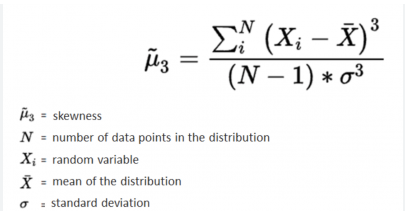

In [33]:
from scipy.stats import skew

def check_and_transform_skewness(data, num_cols, skewness_threshold= 1.0):

    # Iterate through numerical columns
    for col in num_cols:
        # Calculate the skewness of the column
        col_skewness = skew(data[col])

        # Check if skewness is above the threshold
        if np.abs(col_skewness) > skewness_threshold:
            # Perform a log transformation on the column
            data[col] = np.log1p(data[col])
            print(f"Transformed '{col}' with skewness {col_skewness}.")

    return data


In [34]:
check_and_transform_skewness(train_data , num_cols,skewness_threshold= 1.0)

Transformed 'MSSubClass' with skewness 1.0345784840498968.
Transformed 'WoodDeckSF' with skewness 1.0443581328725022.
Transformed 'OpenPorchSF' with skewness 1.1246558912054727.
Transformed 'MasVnrArea' with skewness 1.2511806375284213.


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,GarageType,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,4.110874,RL,65.0,8450.0,Reg,Inside,CollgCr,2Story,7,5.0,2003.0,2003,Gable,VinylSd,VinylSd,BrkFace,5.283204,Gd,PConc,Gd,No,GLQ,706.0,150.0,Ex,856,854,1710,1,2,1,3.0,Gd,0.0,Attchd,RFn,2.0,0.000000,4.127134,2,2008,208500
1,2,3.044522,RL,80.0,9600.0,Reg,FR2,Veenker,1Story,6,7.5,1976.0,1976,Gable,MetalSd,MetalSd,None,0.000000,TA,CBlock,Gd,Gd,ALQ,978.0,284.0,Ex,1262,0,1262,0,2,0,3.0,TA,1.0,Attchd,RFn,2.0,5.700444,0.000000,5,2007,181500
2,3,4.110874,RL,68.0,11250.0,IR1,Inside,CollgCr,2Story,7,5.0,2001.0,2002,Gable,VinylSd,VinylSd,BrkFace,5.093750,Gd,PConc,Gd,Mn,GLQ,486.0,434.0,Ex,920,866,1786,1,2,1,3.0,Gd,1.0,Attchd,RFn,2.0,0.000000,3.761200,9,2008,223500
3,4,4.262680,RL,60.0,9550.0,IR1,Corner,Crawfor,2Story,7,5.0,1915.0,1970,Gable,Wd Sdng,Wd Shng,None,0.000000,TA,BrkTil,TA,No,ALQ,216.0,540.0,Gd,961,756,1717,1,1,0,3.0,Gd,1.0,Detchd,Unf,3.0,0.000000,3.583519,2,2006,140000
4,5,4.110874,RL,84.0,14260.0,IR1,FR2,NoRidge,2Story,8,5.0,2000.0,2000,Gable,VinylSd,VinylSd,BrkFace,5.860786,Gd,PConc,Gd,Av,GLQ,655.0,490.0,Ex,1145,1053,2198,1,2,1,4.0,Gd,1.0,Attchd,RFn,3.0,5.262690,4.442651,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,4.110874,RL,62.0,7917.0,Reg,Inside,Gilbert,2Story,6,5.0,1999.0,2000,Gable,VinylSd,VinylSd,None,0.000000,TA,PConc,Gd,No,Unf,0.0,953.0,Ex,953,694,1647,0,2,1,3.0,TA,1.0,Attchd,RFn,2.0,0.000000,3.713572,8,2007,175000
1456,1457,3.044522,RL,85.0,13175.0,Reg,Inside,NWAmes,1Story,6,6.0,1978.0,1988,Gable,Plywood,Plywood,Stone,4.787492,TA,CBlock,Gd,No,ALQ,790.0,589.0,TA,2073,0,2073,1,2,0,3.0,TA,2.0,Attchd,Unf,2.0,5.857933,0.000000,2,2010,210000
1457,1458,4.262680,RL,66.0,9042.0,Reg,Inside,Crawfor,2Story,7,7.5,1941.0,2006,Gable,CemntBd,CmentBd,None,0.000000,Ex,Stone,TA,No,GLQ,275.0,877.0,Ex,1188,1152,2340,0,2,0,4.0,Gd,2.0,Attchd,RFn,1.0,0.000000,4.110874,5,2010,266500
1458,1459,3.044522,RL,68.0,9717.0,Reg,Inside,NAmes,1Story,5,6.0,1950.0,1996,Hip,MetalSd,MetalSd,None,0.000000,TA,CBlock,TA,Mn,GLQ,49.0,0.0,Gd,1078,0,1078,1,1,0,2.0,Gd,0.0,Attchd,Unf,1.0,5.905362,0.000000,4,2010,142125


In [35]:
#updete numerical and categorical columns
num_cols = list(set(train_data.describe().columns) - set(['Id']))
cat_cols = list(set(train_data.columns) - set(num_cols) - set(['Id']))

## check if a variable follows normal distribution using (Shapiro-Wilk) test

In [36]:
""" Testing the normally distributed features using Shapiro-Wilk test
 the null hypothesis here is that the data follows a normal distribution
 we reject the null hypothesis (aka: data is not normally distributed) if the p-value is less than alpha (typically 5%)
 and we fail to reject the null hypothesis (aka: data is normally distributes) if the p-value is greater than alpha """
feats_std_scale = []
feats_min_max_scale = []
sample_data = train_data.sample(replace = False , n = 500)
from scipy.stats import shapiro
for col in num_cols:
    stat, p = shapiro(train_data[col])
    print('W_Statistic=%.3f, p=%.8f' % (stat, p))

    alpha = 0.001
    if p > alpha:
        print(f'{col} looks like gaussian (fail to reject H0)')
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        feats_min_max_scale.append(col)

W_Statistic=0.783, p=0.00000000
GarageCars does not look Gaussian (reject H0)
W_Statistic=0.841, p=0.00000000
BedroomAbvGr does not look Gaussian (reject H0)
W_Statistic=0.851, p=0.00000000
MSSubClass does not look Gaussian (reject H0)
W_Statistic=0.717, p=0.00000000
WoodDeckSF does not look Gaussian (reject H0)
W_Statistic=0.896, p=0.00000000
YrSold does not look Gaussian (reject H0)
W_Statistic=0.716, p=0.00000000
FullBath does not look Gaussian (reject H0)
W_Statistic=0.769, p=0.00000000
OpenPorchSF does not look Gaussian (reject H0)
W_Statistic=0.660, p=0.00000000
BsmtFullBath does not look Gaussian (reject H0)
W_Statistic=0.966, p=0.00000000
LotFrontage does not look Gaussian (reject H0)
W_Statistic=0.978, p=0.00000000
LotArea does not look Gaussian (reject H0)
W_Statistic=0.941, p=0.00000000
OverallQual does not look Gaussian (reject H0)
W_Statistic=0.962, p=0.00000000
1stFlrSF does not look Gaussian (reject H0)
W_Statistic=0.932, p=0.00000000
BsmtUnfSF does not look Gaussian (re

### Min-max Scaling  Numerical Features

In [37]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaled_data = min_max_scaler.fit_transform(train_data[feats_min_max_scale])
num_df = pd.DataFrame(min_max_scaled_data, columns=feats_min_max_scale)

### Handling Categorical features

In [38]:
# cat_cols ordinal or nominal?
ordinal_cats = ['BsmtQual', 'LotShape', 'HeatingQC', 'BsmtFinType1',  'ExterQual', 
                 'KitchenQual', 'BsmtExposure', 'GarageFinish']
nominal_cats = ['HouseStyle', 'LotConfig', 'RoofStyle', 'GarageType', 'Exterior1st', 
                'Foundation', 'MSZoning', 'Exterior2nd', 'MasVnrType', 'Neighborhood']

In [39]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

ordinal_df = pd.DataFrame()
for ordinal_feat in ordinal_cats:
    label_enc_model = LabelEncoder().fit(train_data[ordinal_feat])
    ordinal_df[ordinal_feat] = label_enc_model.transform(train_data[ordinal_feat])

one_hot_enc_model = OneHotEncoder(sparse_output = False).fit(train_data[nominal_cats])
nominal_data = one_hot_enc_model.transform(train_data[nominal_cats])

a = one_hot_enc_model.categories_
col_names=[]
for list_ in a:
    for element in list_:
        col_names.append(element)

nominal_df = pd.DataFrame(nominal_data , columns = col_names) 

In [40]:
# OrdinalEncoder()
from sklearn.preprocessing import OrdinalEncoder
categories = ['Fa', 'TA', 'Gd', 'Ex']

OrdinalEncoder_model = OrdinalEncoder(categories = [['Fa', 'TA', 'Gd', 'Ex']]).fit(train_data[['BsmtQual']])
OrdinalEncoder_model.transform(train_data[['BsmtQual']])

array([[2.],
       [2.],
       [2.],
       ...,
       [1.],
       [1.],
       [1.]])

### Merging the nominal_df, ordinal_df and numerical_df to get the final data that will be the input to the model, and splitting the data into train and validation sets

In [41]:
final_data = pd.concat([nominal_df, ordinal_df, num_df], axis=1)


In [42]:
X = final_data[list(set(final_data.columns) - set(['SalePrice']))]
y = final_data['SalePrice']



In [43]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

### Linear Regression Model

In [44]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [45]:
y_hat_sklearn = reg.predict(X_train)
y_hat_sklearn

array([0.45167542, 0.27192688, 0.16414642, ..., 0.70055389, 0.51180458,
       0.56669044])

### Evaluating our linear regression model

In [46]:
def mse(actual, predicted):
    return np.mean(np.square(actual-predicted))

def rmse(actual, predicted):
    return np.sqrt(np.mean(np.square(actual-predicted)))

def mae(actual, predicted):
    return np.mean(np.abs(actual-predicted))

def mape(actual, predicted, epsilon = 0.0001):
    return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

def rae(actual, predicted):
    numerator = np.sum(np.abs(predicted - actual))
    denominator = np.sum(np.abs(np.mean(actual) - actual))
    return numerator / denominator

def r_squared(actual, predicted):
    sse = np.sum(np.square(actual-predicted))
    sst = np.sum(np.square(actual-np.mean(actual)))
    return 1 - (sse/sst)

def adj_r_squared(X, actual, predicted): 
    r_squ = r_squared(actual, predicted)
    first_term = 1 - r_squ
    sec_term = (len(actual)-1)/(len(actual) - X.shape[1] - 1)
    return 1 - (first_term * sec_term)

In [47]:
print('The mean squared error is: ', mse(y_train, y_hat_sklearn))
print('the root mean squard error is: ', rmse(y_train, y_hat_sklearn))
print('The mean absolute error is: ', mae(y_train, y_hat_sklearn))
print('The mean absolute perentage error is: ', mape(y_train, y_hat_sklearn))
print('The relative absolute error is: ', rae(y_train, y_hat_sklearn))
print('The coefficient of determination is: ', r_squared(y_train, y_hat_sklearn))
print('The adjusted coefficient of determination is: ', adj_r_squared(X_train, y_train, y_hat_sklearn))

The mean squared error is:  0.003547342534727225
the root mean squard error is:  0.05955957131080801
The mean absolute error is:  0.0423617889306111
The mean absolute perentage error is:  52.25322539391129
The relative absolute error is:  0.24315573438106092
The coefficient of determination is:  0.9259972456593495
The adjusted coefficient of determination is:  0.9154495326689489


### Removing the multi-collinearity from the data before performing backward-stepwise selection of features

### A naive approach which removes all the features with high VIF at once (not the desired approach, just made it for illustration)

In [48]:
# put all columns names in one column named feature

test_data = pd.DataFrame()
test_data["feature"] = X_train.columns

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def drop_high_vif_columns(X_train, vif_threshold= 15):
    X_train_copy = X_train.copy()  # Create a copy of the training data
    
    dropped_columns = []  # To store the names of columns dropped due to high VIF
    
    while True:
        vif_data = pd.DataFrame()
        vif_data["feature"] = X_train_copy.columns
        vif_data["vif"] = [variance_inflation_factor(X_train_copy.values, i) for i in range(X_train_copy.shape[1])]

        max_vif = vif_data["vif"].max()
        
        if max_vif > vif_threshold:
            max_vif_idx = vif_data["vif"].idxmax()
            column_to_drop = vif_data.loc[max_vif_idx, "feature"]
            dropped_columns.append(column_to_drop)
            X_train_copy = X_train_copy.drop(column_to_drop, axis=1)
        else:
            break
    
    return X_train_copy, dropped_columns

# Usage example
X_train_filtered, dropped_columns = drop_high_vif_columns(X_train)
print("Dropped columns:", dropped_columns)

C:\Users\Eng Samy\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Eng Samy\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Eng Samy\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Eng Samy\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\Eng Samy\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\Eng Samy\anaconda3\lib\site-packages\statsmodels\regression\li

Dropped columns: ['MetalSd', '2.5Unf', 'Gilbert', 'CBlock', 'RH', 'Mansard', 'BrkFace', 'CulDSac', 'NPkVill', 'Attchd', 'GrLivArea', 'Gable', 'RL', 'YearBuilt', '1Story', 'VinylSd', 'None', 'OverallQual', 'ExterQual', 'FullBath', '1stFlrSF', 'BedroomAbvGr', 'CemntBd', 'BsmtQual', 'LotArea']


In [50]:
len(dropped_columns)


25

In [51]:
X_train_filtered.shape


(1003, 94)

### Having cleaned our training data from multi-collinearity, we can measure the significance level of each feature and perform subset selection using the backward-stepwise method

In [52]:
from statsmodels.api import OLS
LRresult = OLS(y_train , X_train_filtered).fit().summary2().tables[1]
LRresult = LRresult.reset_index().rename(columns = {'index' : 'feature_name'})


In [53]:
# order the columns for the most important feature (eigen vector) to the least
LRresult.sort_values(by = 'Coef.' , ascending = False)

,feature_name,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
46,2ndFlrSF,0.333413,0.031055,10.736143,2.121428e-25,0.272465,0.394362
64,BsmtFinSF1,0.289676,0.021180,13.677031,7.293510e-39,0.248109,0.331242
13,BsmtUnfSF,0.209863,0.018287,11.476265,1.439389e-28,0.173974,0.245752
32,Stone,0.205805,0.084747,2.428474,1.535536e-02,0.039483,0.372126
91,StoneBr,0.195421,0.022305,8.761213,9.314955e-18,0.151645,0.239197
...,...,...,...,...,...,...,...
76,CarPort,-0.080684,0.039456,-2.044899,4.115202e-02,-0.158120,-0.003248
50,AsbShng,-0.085404,0.051854,-1.647003,9.990259e-02,-0.187172,0.016364
20,Stucco,-0.111700,0.038330,-2.914174,3.653670e-03,-0.186925,-0.036475
34,Stone,-0.130562,0.118994,-1.097215,2.728375e-01,-0.364097,0.102973


In [54]:
significant_feats_df = X_train_filtered.copy()
insignificant_feats_ls = []
LRresult = (OLS(y_train,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})

# if the results contain an insignificant feature (a feature with p-value > 0.05), 
# then we can drop it form the model and re-calculate the summary table
while LRresult['P>|t|'].max() > 0.05:
    # get the feature with the max p-value (the least significance for the model)
    insignificant_feat = LRresult[LRresult['P>|t|'] == LRresult['P>|t|'].max()][['feature_name']].values[0, 0]
    # we want to know th insignificant_feats
    insignificant_feats_ls.append(insignificant_feat)
    # drop the insignificant_feats from the copy df
    significant_feats_df = significant_feats_df.drop(columns = [insignificant_feat])
    # after drop the features we need to calculate the p-value again beacuse it's change after eacch drop
    LRresult = (OLS(y_train,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})

In [55]:
len(insignificant_feats_ls)


45

In [56]:
LRresult = OLS(y_train,significant_feats_df).fit().summary().tables[0]
LRresult

Dep. Variable:,SalePrice,R-squared (uncentered):,0.978
Model:,OLS,Adj. R-squared (uncentered):,0.977
Method:,Least Squares,F-statistic:,1023.
Date:,"Mon, 04 Dec 2023",Prob (F-statistic):,0.00
Time:,20:12:54,Log-Likelihood:,1120.6
No. Observations:,1003,AIC:,-2159.
Df Residuals:,962,BIC:,-1958.
Df Model:,41,,
Covariance Type:,nonrobust,,


### Checking the linear regression model assumptions
#### the epslon term (Erorr) 'Resudelas' is assumed to be
1. **Has mean of zero**
2. **Is normally dittributed**
3. **Has constant variance at evrey value of X (not fanning out)**



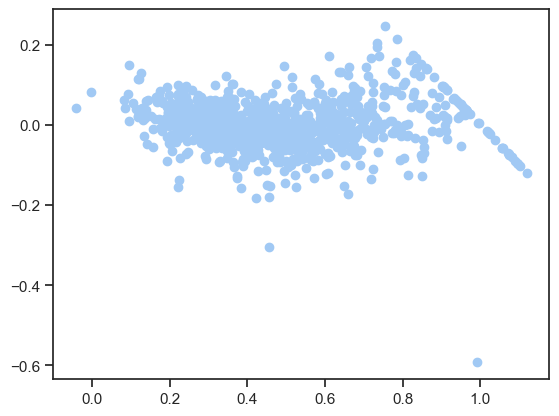

In [57]:
import matplotlib.pyplot as plt
residuals = y_train - y_hat_sklearn

# the linear regression model without any regularization or subset selection
plt.scatter(y_hat_sklearn, residuals)
plt.show()

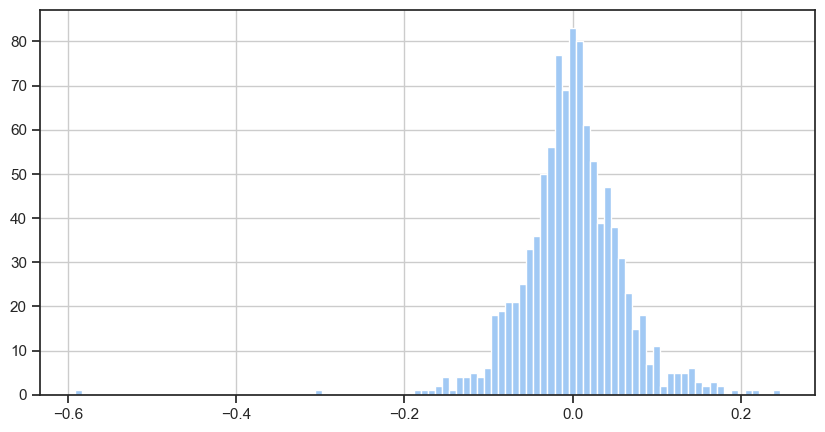

In [58]:
residuals.hist(bins = 100 , figsize = (10,5));
